In [11]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

In [6]:
dir_path = r"C:\Users\MRUTYUNJAY BISWAL\Downloads\to_be_uploaded"

train = pd.read_csv(os.path.join(dir_path, "train.csv"))
test = pd.read_csv(os.path.join(dir_path, "test.csv"))

display(train.head())
display(test.head())

,id,Elevation,Aspect,Slope,Horizontal_Distance_to_Hydrology,Vertical_Distance_to_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_to_Fire_points,Rawah,Neota,Comanche,Cache_la_Poudre,Cover_Type
0,id_533979,3380,348,13,242,38,1471,194,217,161,2014,0,1,0,0,1
1,id_511393,3143,246,23,85,24,446,166,250,216,2252,0,1,0,0,2
2,id_566029,2473,272,38,120,76,319,97,221,247,300,0,0,1,0,3
3,id_352893,2789,355,12,162,2,1650,201,219,156,1539,0,0,1,0,1
4,id_324190,3229,310,31,67,8,3588,123,202,211,1770,1,0,0,0,1


,id,Elevation,Aspect,Slope,Horizontal_Distance_to_Hydrology,Vertical_Distance_to_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_to_Fire_points,Rawah,Neota,Comanche,Cache_la_Poudre
0,id_54748,2995,135,5,577,23,5414,228,238,144,6399,1,0,0,0
1,id_87368,2932,154,14,85,1,4476,236,240,130,3204,1,0,0,0
2,id_43425,2856,39,15,190,20,3500,219,205,117,5362,1,0,0,0
3,id_63030,2884,293,5,192,17,3164,205,239,173,3874,1,0,0,0
4,id_68071,2673,58,9,228,2,1489,227,221,128,937,1,0,0,0


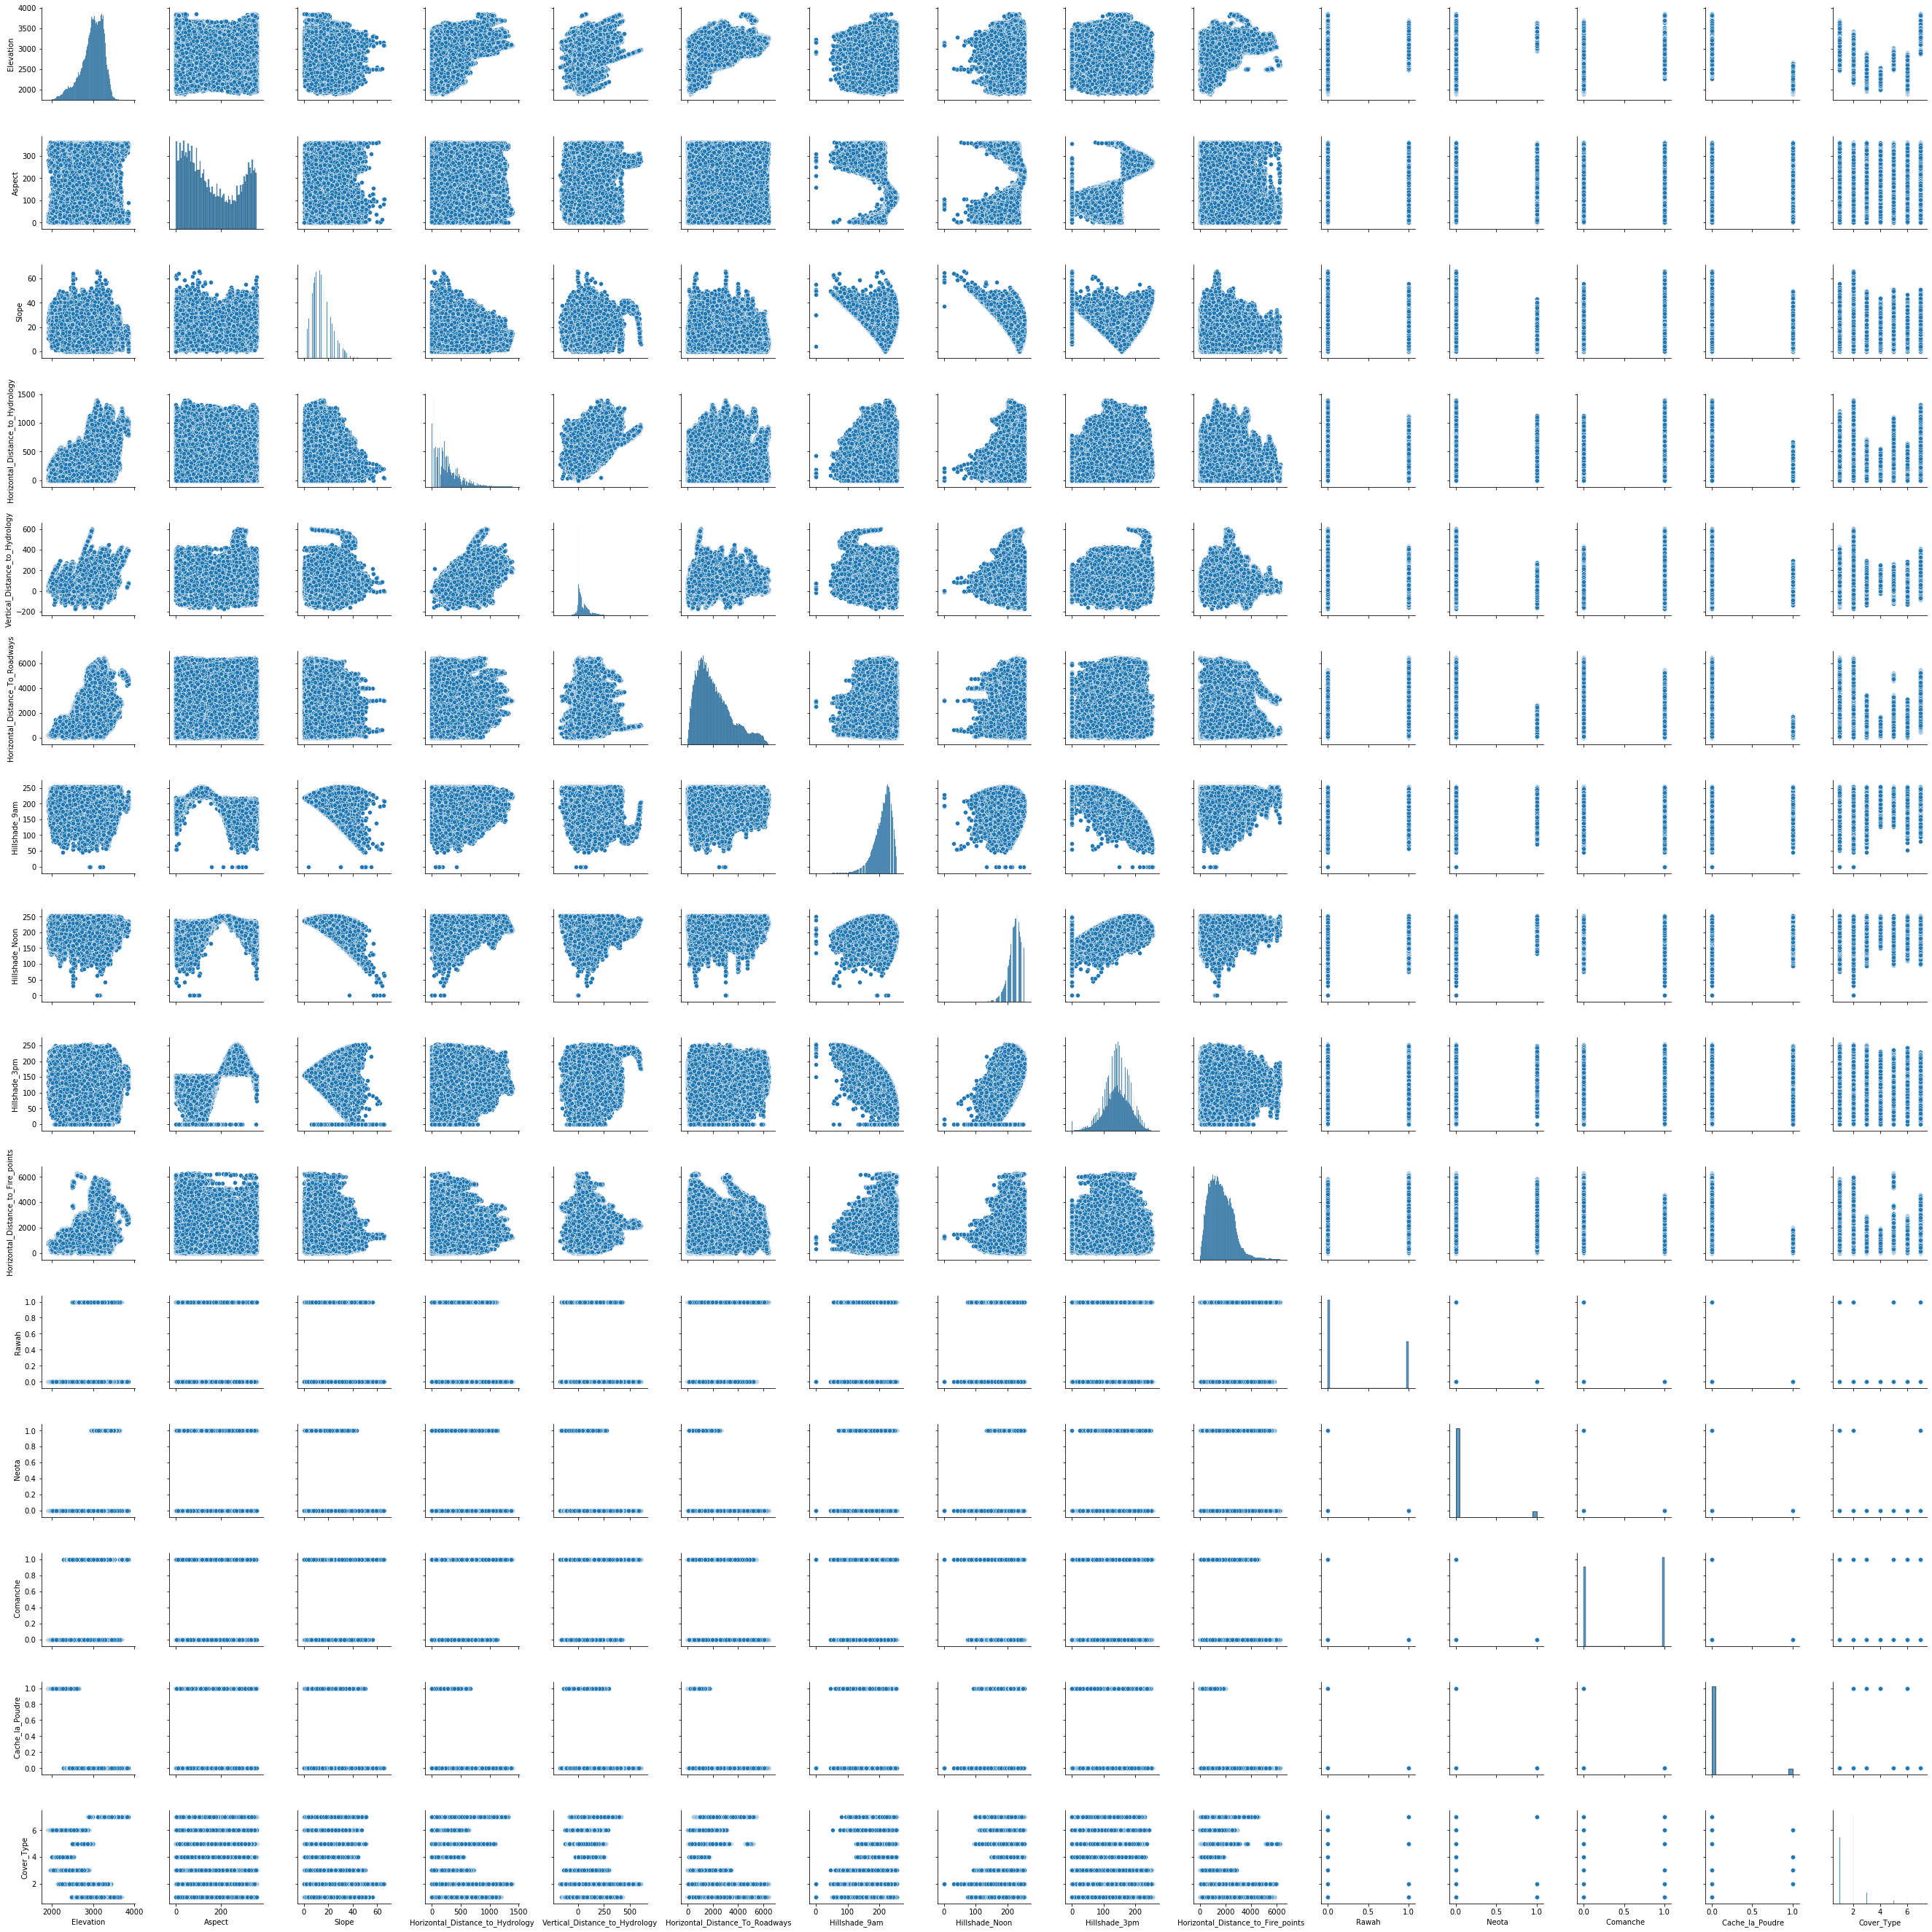

In [13]:
sns.pairplot(train)
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
ss = StandardScaler()

In [31]:
target_col = "Cover_Type"
cat_cols = ["Rawah", " Neota", " Comanche", " Cache_la_Poudre"]

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(train.drop(columns=['id', target_col]),
                                                   train[target_col].values.reshape(-1, 1),
                                                   test_size=0.2, random_state=42)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(371847, 14)
(371847, 1)
(92962, 14)
(92962, 1)


In [35]:
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [36]:
xgbc = xgb.XGBClassifier()

In [37]:
xgbc.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
pred_test = xgbc.predict(X_test)

In [40]:
from sklearn.metrics import f1_score

f1_score(y_pred=pred_test, y_true=Y_test, average="macro")

0.8435423003707323

In [41]:
test

,id,Elevation,Aspect,Slope,Horizontal_Distance_to_Hydrology,Vertical_Distance_to_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_to_Fire_points,Rawah,Neota,Comanche,Cache_la_Poudre
0,id_54748,2995,135,5,577,23,5414,228,238,144,6399,1,0,0,0
1,id_87368,2932,154,14,85,1,4476,236,240,130,3204,1,0,0,0
2,id_43425,2856,39,15,190,20,3500,219,205,117,5362,1,0,0,0
3,id_63030,2884,293,5,192,17,3164,205,239,173,3874,1,0,0,0
4,id_68071,2673,58,9,228,2,1489,227,221,128,937,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116198,id_244,2955,60,20,201,33,4934,231,195,88,3248,1,0,0,0
116199,id_1955,2611,312,25,182,83,1061,145,213,204,598,0,0,1,0
116200,id_3096,2094,99,29,85,41,495,252,185,40,175,0,0,0,1
116201,id_64294,2730,38,15,300,-17,1463,218,205,118,1756,1,0,0,0


In [42]:
sub = xgbc.predict(ss.fit_transform(test.drop(columns=["id"])))
sub

array([2, 1, 2, ..., 4, 2, 1], dtype=int64)

In [43]:
submission = pd.DataFrame()
submission["id"] = test["id"]
submission["Cover_Type"] = sub
submission

,id,Cover_Type
0,id_54748,2
1,id_87368,1
2,id_43425,2
3,id_63030,2
4,id_68071,2
...,...,...
116198,id_244,1
116199,id_1955,2
116200,id_3096,4
116201,id_64294,2


In [44]:
submission.to_csv("baseline_submission.csv", index=False)